# MULTIPLICACIÓN DE MATRICES EN PARALELO Y SECUENCIAL

Laura Sophia González Montoya - HPC UTP 

## Especificaciones de maquina
Encontradas en los archivos pc_info.txt y gpu_info.txt dentro del repositorio

## Shell Script 
prueba.hpc y prueba2.hpc son shell scripts que realizan de forma automatica la compilacion, ejecucion y recoleccion de datos, el primer archivo es para el proceso de secuencial  y el segundo para el proceso de paralelo

## Tiempos de ejecución en secuencial

datos_paralelo.txt y datos_sec.txt guardan los tiempos de ejecucion, con 30 tiempos de ejecución por cada tamaño de matriz, siendo estos 100,250,500,750 y 1000

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import load_dataset

In [2]:
datos = pd.read_csv("datos_sec.txt")
datos.head()

,TAM_S,TIME_S
0,100,0.011374
1,250,0.162874
2,500,1.588370
3,750,6.227720
4,1000,20.103900


Sacamos el promedio de los datos de la tabla secuencial 

In [3]:
datSeq = datos.groupby(["TAM_S"]).mean()
datSeq.reset_index(level=0,inplace=True)
datSeq

,TAM_S,TIME_S
0,100,0.011955
1,250,0.165485
2,500,1.590111
3,750,6.461071
4,1000,20.438326


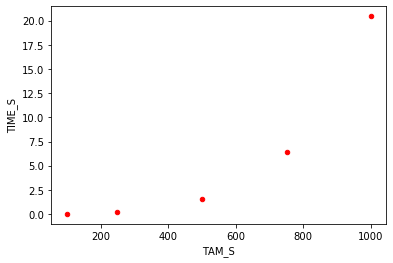

In [4]:
datSeq.plot(kind='scatter',x='TAM_S',y='TIME_S',color='red')
plt.show()

## Secuencial g++ -O3 optimizacion

In [5]:
datos = pd.read_csv("datos_sec_op.txt")
datos.head()

,TAM_SO,TIME_SO
0,100,0.054039
1,250,0.032230
2,500,0.446058
3,750,2.565640
4,1000,13.509500


In [6]:
datSeqOp = datos.groupby(["TAM_SO"]).mean()
datSeqOp.reset_index(level=0,inplace=True)
datSeqOp

,TAM_SO,TIME_SO
0,100,0.004197
1,250,0.031108
2,500,0.325296
3,750,2.447645
4,1000,13.514755


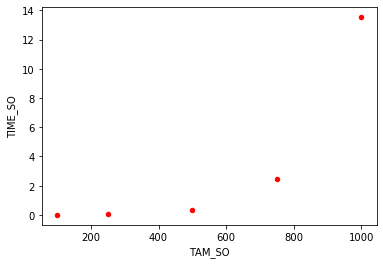

In [7]:
datSeqOp.plot(kind='scatter',x='TAM_SO',y='TIME_SO',color='red')
plt.show()

## SPEEDUP ENTRE SECUENCIAL Y SECUENCIAL CON OPTIMIZACION

### $$Speedup = \frac{secuencial}{paralelo}$$

In [90]:
datosMerge = pd.merge(left = datSeq, left_index = False, left_on='TAM_S', 
                       right=datSeqOp, right_index=False,right_on = 'TAM_SO')
datosMerge

,TAM_S,TIME_S,TAM_SO,TIME_SO
0,100,0.011955,100,0.004197
1,250,0.165485,250,0.031108
2,500,1.590111,500,0.325296
3,750,6.461071,750,2.447645
4,1000,20.438326,1000,13.514755


In [91]:
datosMerge['SPEEDUP'] = datosMerge["TIME_S"]/ datosMerge["TIME_SO"]
datosMerge

,TAM_S,TIME_S,TAM_SO,TIME_SO,SPEEDUP
0,100,0.011955,100,0.004197,2.848041
1,250,0.165485,250,0.031108,5.319689
2,500,1.590111,500,0.325296,4.888193
3,750,6.461071,750,2.447645,2.639709
4,1000,20.438326,1000,13.514755,1.512297


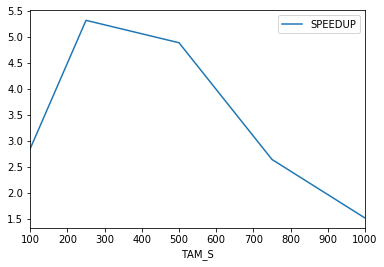

In [93]:
ax = plt.gca()
datosMerge.plot(kind='line',x='TAM_S',y='SPEEDUP', ax=ax)
plt.show()

## Tiempos de ejecucion en paralelo

In [8]:
datos_p = pd.read_csv("datos_paralelo.txt")
datos_p.head()

,TAM_P,TIME_P
0,100,0.009151
1,250,0.090948
2,500,1.016210
3,750,4.629140
4,1000,16.301400


In [9]:
datParl = datos_p.groupby(["TAM_P"]).mean()
datParl.reset_index(level=0,inplace=True)
datParl

,TAM_P,TIME_P
0,100,0.006601
1,250,0.102164
2,500,1.247381
3,750,5.062511
4,1000,15.967606


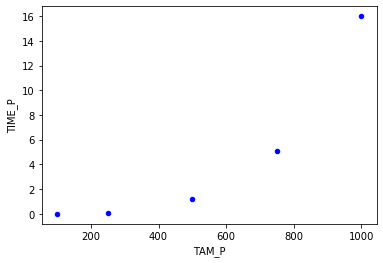

In [8]:
datParl.plot(kind='scatter',x='TAM_P',y='TIME_P',color='blue')
plt.show()

## Tiempos Paralelo transpuesta (Optimización)

In [10]:
datos = pd.read_csv("datos_paralelo_trans.txt")
datos.head()

,TAM_PO,TIME_PO
0,100,0.009130
1,250,0.080604
2,500,0.626531
3,750,2.175680
4,1000,5.213380


In [11]:
datParlPo = datos.groupby(["TAM_PO"]).mean()
datParlPo.reset_index(level=0,inplace=True)
datParlPo

,TAM_PO,TIME_PO
0,100,0.006235
1,250,0.081707
2,500,0.636040
3,750,2.218432
4,1000,5.106333


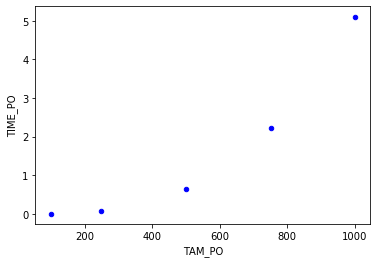

In [12]:
datParlPo.plot(kind='scatter',x='TAM_PO',y='TIME_PO',color='blue')
plt.show()

## SPEEDUP ENTRE PROCESOS Y PROCESOS CON MATRIZ TRANSPUESTA

In [83]:
datosMerge = pd.merge(left = datParl, left_index = False, left_on='TAM_P', 
                       right=datParlPo, right_index=False,right_on = 'TAM_PO')
datosMerge

,TAM_P,TIME_P,TAM_PO,TIME_PO
0,100,0.006601,100,0.006235
1,250,0.102164,250,0.081707
2,500,1.247381,500,0.636040
3,750,5.062511,750,2.218432
4,1000,15.967606,1000,5.106333


In [84]:
datosMerge['SPEEDUP'] = datosMerge["TIME_P"]/ datosMerge["TIME_PO"]

In [86]:
datosMerge.head()

,TAM_P,TIME_P,TAM_PO,TIME_PO,SPEEDUP
0,100,0.006601,100,0.006235,1.058638
1,250,0.102164,250,0.081707,1.250362
2,500,1.247381,500,0.636040,1.961169
3,750,5.062511,750,2.218432,2.282022
4,1000,15.967606,1000,5.106333,3.127020


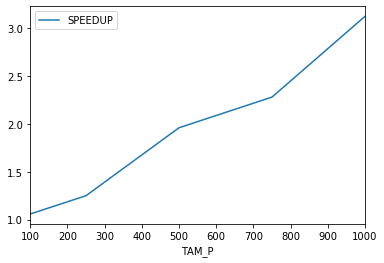

In [82]:
ax = plt.gca()
datosMerge.plot(kind='line',x='TAM_P',y='SPEEDUP', ax=ax)
plt.show()

## SEEPUP ENTRE SECUENCIAL Y PARALELO

In [95]:
datosMerge = pd.merge(left = datSeq, left_index = False, left_on='TAM_S', 
                       right=datParl, right_index=False,right_on = 'TAM_P')
datosMerge

,TAM_S,TIME_S,TAM_P,TIME_P
0,100,0.011955,100,0.006601
1,250,0.165485,250,0.102164
2,500,1.590111,500,1.247381
3,750,6.461071,750,5.062511
4,1000,20.438326,1000,15.967606


In [96]:
datosMerge['SPEEDUP'] = datosMerge["TIME_S"]/ datosMerge["TIME_P"]
datosMerge

,TAM_S,TIME_S,TAM_P,TIME_P,SPEEDUP
0,100,0.011955,100,0.006601,1.811104
1,250,0.165485,250,0.102164,1.619805
2,500,1.590111,500,1.247381,1.274760
3,750,6.461071,750,5.062511,1.276258
4,1000,20.438326,1000,15.967606,1.279987


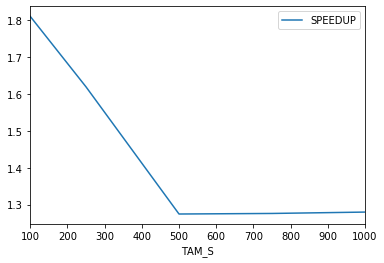

In [97]:
ax = plt.gca()
datosMerge.plot(kind='line',x='TAM_S',y='SPEEDUP', ax=ax)
plt.show()

## Tiempos de ejecución en procesos (fork)

In [16]:
datos = pd.read_csv("datos_fork.txt")
datos.head()

,TAM_F,TIME_F
0,100,0.035183
1,250,0.362052
2,500,2.574240
3,750,8.895790
4,1000,24.156400


In [17]:
datfork = datos.groupby(["TAM_F"]).mean()
datfork.reset_index(level=0,inplace=True)
datfork

,TAM_F,TIME_F
0,100,0.021464
1,250,0.359584
2,500,2.611877
3,750,9.047678
4,1000,24.417552


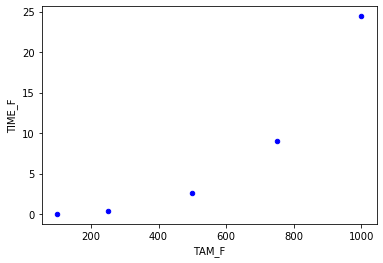

In [18]:
datfork.plot(kind='scatter',x='TAM_F',y='TIME_F',color='blue')
plt.show()

## Fork con matriz transpuesta (optimización)

In [19]:
datos = pd.read_csv("datos_fork_trans.txt")
datos.head()

,TAM_FT,TIME_FT
0,100,0.023696
1,250,0.366918
2,500,2.657680
3,750,8.625620
4,1000,24.530700


In [20]:
datforktrans = datos.groupby(["TAM_FT"]).mean()
datforktrans.reset_index(level=0,inplace=True)
datforktrans

,TAM_FT,TIME_FT
0,100,0.025711
1,250,0.342271
2,500,2.576902
3,750,8.885451
4,1000,24.900223


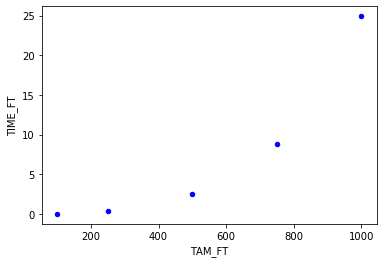

In [21]:
datforktrans.plot(kind='scatter',x='TAM_FT',y='TIME_FT',color='blue')
plt.show()

## SPEEDUP ENTRE PROCESOS Y PROCESOS CON TRANSPUESTA

In [99]:
datosMerge = pd.merge(left = datfork, left_index = False, left_on='TAM_F', 
                       right=datforktrans, right_index=False,right_on = 'TAM_FT')
datosMerge

,TAM_F,TIME_F,TAM_FT,TIME_FT
0,100,0.021464,100,0.025711
1,250,0.359584,250,0.342271
2,500,2.611877,500,2.576902
3,750,9.047678,750,8.885451
4,1000,24.417552,1000,24.900223


In [100]:
datosMerge['SPEEDUP'] = datosMerge["TIME_F"]/ datosMerge["TIME_FT"]
datosMerge

,TAM_F,TIME_F,TAM_FT,TIME_FT,SPEEDUP
0,100,0.021464,100,0.025711,0.834816
1,250,0.359584,250,0.342271,1.050583
2,500,2.611877,500,2.576902,1.013573
3,750,9.047678,750,8.885451,1.018258
4,1000,24.417552,1000,24.900223,0.980616


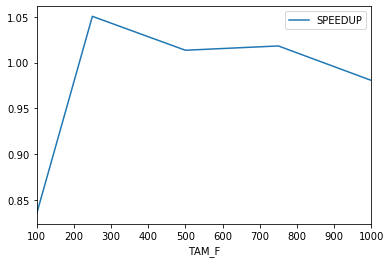

In [102]:
ax = plt.gca()
datosMerge.plot(kind='line',x='TAM_F',y='SPEEDUP', ax=ax)
plt.show()

## SPEEDUP SECUENCIAL Y PROCESOS

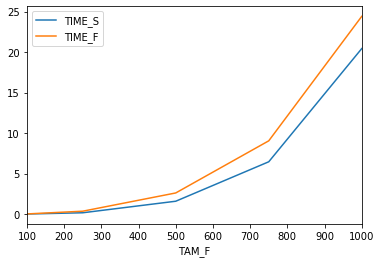

In [22]:
ax = plt.gca()
datSeq.plot(kind='line',x='TAM_S',y='TIME_S', ax=ax)
datfork.plot(kind='line',x='TAM_F',y='TIME_F', ax=ax)
plt.show()

In [23]:
datosMerge1 = pd.merge(left = datSeq, left_index = False, left_on='TAM_S', 
                       right=datfork, right_index=False,right_on = 'TAM_F')
datosMerge1

,TAM_S,TIME_S,TAM_F,TIME_F
0,100,0.011955,100,0.021464
1,250,0.165485,250,0.359584
2,500,1.590111,500,2.611877
3,750,6.461071,750,9.047678
4,1000,20.438326,1000,24.417552


In [103]:
datosMerge1['SPEEDUP'] = datosMerge1["TIME_S"]/ datosMerge1["TIME_F"]
datosMerge1

,TAM_S,TIME_S,TAM_F,TIME_F,SPEEDUP
0,100,0.011955,100,0.021464,0.556966
1,250,0.165485,250,0.359584,0.460212
2,500,1.590111,500,2.611877,0.608800
3,750,6.461071,750,9.047678,0.714114
4,1000,20.438326,1000,24.417552,0.837034


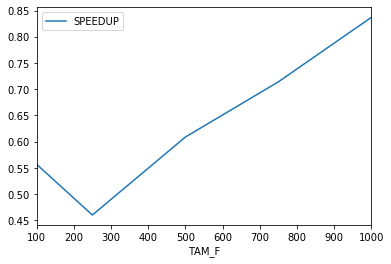

In [104]:
ax = plt.gca()
datosMerge1.plot(kind='line',x='TAM_F',y='SPEEDUP', ax=ax)
plt.show()

## SPEEDUP PARALELO Y PROCESOS

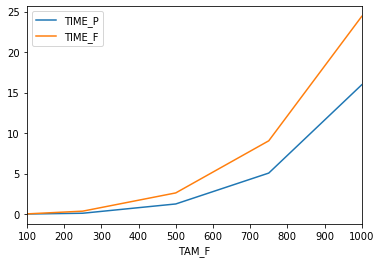

In [26]:
ax = plt.gca()
datParl.plot(kind='line',x='TAM_P',y='TIME_P', ax=ax)
datfork.plot(kind='line',x='TAM_F',y='TIME_F', ax=ax)
plt.show()

In [27]:
datosMerge2 = pd.merge(left = datParl, left_index = False, left_on='TAM_P', 
                       right=datfork, right_index=False,right_on = 'TAM_F')
datosMerge2

,TAM_P,TIME_P,TAM_F,TIME_F
0,100,0.006601,100,0.021464
1,250,0.102164,250,0.359584
2,500,1.247381,500,2.611877
3,750,5.062511,750,9.047678
4,1000,15.967606,1000,24.417552


In [105]:
datosMerge2['SPEEDUP'] = datosMerge2["TIME_P"]/ datosMerge2["TIME_F"]
datosMerge2

,TAM_P,TIME_P,TAM_F,TIME_F,SPEEDUP
0,100,0.006601,100,0.021464,0.307528
1,250,0.102164,250,0.359584,0.284116
2,500,1.247381,500,2.611877,0.477580
3,750,5.062511,750,9.047678,0.559537
4,1000,15.967606,1000,24.417552,0.653940


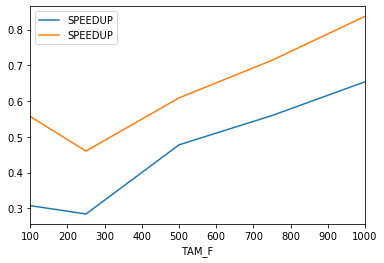

In [106]:
ax = plt.gca()
datosMerge2.plot(kind='line',x='TAM_F',y='SPEEDUP', ax=ax)
datosMerge1.plot(kind='line',x='TAM_F',y='SPEEDUP', ax=ax)
plt.show()